# Chapter 9: Conditional Expectation
 
This Jupyter notebook is the Python equivalent of the R code in section 9.8 R, pp. 408 - 410, [Introduction to Probability, 1st Edition](https://www.crcpress.com/Introduction-to-Probability/Blitzstein-Hwang/p/book/9781466575578), Blitzstein & Hwang.

----

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Mystery prize simulation

We can use simulation to show that in Example 9.1.7, the example of bidding on a mystery prize with unknown value, any bid will lead to a negative payout on average. First choose a bid `b` (we chose 0.6); then simulate a large number of hypothetical mystery prizes using `rvs` in [`scipy.stats.uniform`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html), and store them in `v`:

In [2]:
# seed the random number generator
np.random.seed(2)

from scipy.stats import uniform

b = 0.6
nsim = 10**5
v = uniform.rvs(size=nsim)

The bid is accepted if `b > (2/3)*v`. To get the average profit conditional on an accepted bid, we use [`numpy.where`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) to find the indices in `v` where the values satisfy the condition:

In [3]:
bid_accepted = v[np.where(b > (2/3)*v)]

avg_profit = np.mean(bid_accepted) - b

print('average profit conditional on an accepted bid: {}'.format(avg_profit))

average profit conditional on an accepted bid: -0.1512748480554872


This value is negative regardless of `b`, as you can check by experimenting with different values of`b`.  Try changing the value for `b` in the code block above, and then hit SHIFT+ENTER to re-run the code blocks. You can also try changing the seed value for random number generation as well.

## Time until HH vs. HT

To verify the results of Example 9.1.9, we can start by generating a long sequence of fair coin tosses. This is done with the [`numpy.random.choice`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function. `numpy.random.choice` will chooose with replacement items from the specified list of `H` and `T`, returning a sequence of length specified bye the `size` parameter. We use [`str.join`](https://docs.python.org/3.7/library/string.html), passing in an empty `str` argument `''` to be interspersed between the elements in the given sequence. This results in a single string of `H`'s and `T`'s:

In [4]:
''.join(np.random.choice(['H', 'T'], size=100))

'HHTHHTTTTHTHTTTHHTHTHTHHTTHHHTHTTHHTHTHTTTHTTTHHHTTTHTTHHHHTTHHTTTHHTHTTHTTTHHTHHTTTHHHHHHHHTHHTTTTH'

A sequence of length 100 is enough to virtually guarantee that both `HH` and `HT` will have appeared at least once.

To determine how many tosses are required on average to see `HH` and `HT`, we need to generate many sequences of coin tosses. For this, we use our familiar friend [Python list comprehensions](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) to execute a large number of iterations:

In [5]:
np.random.seed(3)

r = [''.join(np.random.choice(['H', 'T'], size=100)) for _ in range(10**3)]

Now `r` contains a thousand sequences of coin tosses, each of length 100. To find the first appearance of `HH` in each of these sequences, it is easiest to use [regular expressions](https://docs.python.org/3.7/howto/regex.html) in Python's [`re`](https://docs.python.org/3.7/library/re.html) library.  We load the `re` library with the `import` keyword, and use `re.search` to obtain the start and end indices of the first appearance of `HH` in each sequence `ht_seq` in `r`.

In [6]:
import re

# to learn more about re, un-comment ouf the following line
#print(re.__doc__)

target = 'HH'

t = [re.search(target, ht_seq).span() for ht_seq in r]
t = np.matrix(t)

print('matrix t has shape: {}'.format(t.shape))

t[0:10, :]

matrix t has shape: (1000, 2)


matrix([[ 0,  2],
        [ 1,  3],
        [ 5,  7],
        [ 1,  3],
        [12, 14],
        [ 0,  2],
        [ 0,  2],
        [ 1,  3],
        [ 3,  5],
        [ 0,  2]])

The code above creates a two-column matrix `t`, whose columns contain the starting and ending positions of the first appearance of `HH` in each sequence of coin tosses. (Use `t[0:10, :]` to display the first 10 rows of the matrix and get an idea of what your results look like.) What we want are the ending positions, given by the second column. In particular, we want the average value of the second column, which is an approximation of the average waiting time for `HH`:

In [7]:
mean = t[:, 1].mean()

print('average waiting time for \'{}\': {}'.format(target, mean))

average waiting time for 'HH': 6.148


Is your answer around 6? Trying again with `HT` instead of `HH`, is your answer around 4? You can change the value of the `target` variable in the earlier code block, and then hit SHIFT+ENTER to execute the code blocks again.

## Linear regression

In Example 9.3.10, we derived formulas for the slope and intercept of a linear regression model, which can be used to predict a response variable using an explanatory variable. Let's try to apply these formulas to a simulated dataset:

In [8]:
np.random.seed(4)

from scipy.stats import norm

x = norm.rvs(size=100)
y = 3 + 5*x + norm.rvs(size=100)

The array `x` contains 100 realizations of the random variable $X \sim N(0, 1)$ and the array `y` contains 100 realizations of the random variable $Y = a + bX + \epsilon$, where $\epsilon \sim N(0,1)$. As we can see, the true values of $a$ and $b$ for this dataset are 3 and 5, respectively. We can visualize the data as a scatterplot with [`matplotlib.pyplot.scatter(x,y)`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html).

In [9]:
# numpy.cov(x, y) returns a 2 x 2 covariance matrix
#   cov(x,x)    cov(x,y)
#   cov(y,x)    cov(y,y)
cov_xy = np.cov(x, y, ddof=1)[0][1]
var_x = np.var(x, ddof=1)

b = cov_xy / var_x
a = np.mean(y) - b*np.mean(x)

print('b = {}'.format(b))
print('a = {}'.format(a))

b = 5.131242923837191
a = 3.017178693130394


Here `numpy.cov(x, y, ddof=1)[0][1]`, `numpy.var(x, ddof=1)`, and `numpy.mean(x)` provide the sample covariance, sample variance, and sample mean, estimating the quantities $Cov(X, Y), Var(X)$, and $\mathbb{E}(X)$, respectively. (We have discussed sample mean and sample variance in detail in earlier chapters. Sample covariance is defined analogously, and is a natural way to estimate the true covariance.)

You should find that `b` is close to 5 and `a` is close to 3. These estimated values define the line of best fit. We use yet another list comprehension to calculate `y` values corresponding to `x` on the best-fit line using `a` and `b`, and then `matplotlit.pyplot.plot` lets use render the _line of best fit_ on top of our scatterplot:

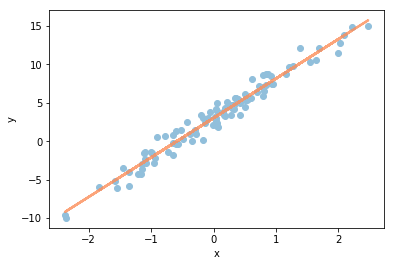

In [10]:
plt.scatter(x, y, color='#91bfdb')

abline_values = [b * val + a for val in x]

plt.plot(x, abline_values, lw=2.2, alpha=0.8, color='#fc8d59')

plt.xlabel('x')
plt.ylabel('y')

plt.show()

----

&copy; Blitzstein, Joseph K.; Hwang, Jessica. Introduction to Probability (Chapman & Hall/CRC Texts in Statistical Science).